train: (51047, 58) | holdout: (20000, 58)


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes


dtypes (first 25 cols):
 CustomerID                 int64
Churn                     object
MonthlyRevenue           float64
MonthlyMinutes           float64
TotalRecurringCharge     float64
DirectorAssistedCalls    float64
OverageMinutes           float64
RoamingCalls             float64
PercChangeMinutes        float64
PercChangeRevenues       float64
DroppedCalls             float64
BlockedCalls             float64
UnansweredCalls          float64
CustomerCareCalls        float64
ThreewayCalls            float64
ReceivedCalls            float64
OutboundCalls            float64
InboundCalls             float64
PeakCallsInOut           float64
OffPeakCallsInOut        float64
DroppedBlockedCalls      float64
CallForwardingCalls      float64
CallWaitingCalls         float64
MonthsInService            int64
UniqueSubs                 int64
dtype: object

Missing values (top 20):


AgeHH1                   909
AgeHH2                   909
PercChangeRevenues       367
PercChangeMinutes        367
DirectorAssistedCalls    156
TotalRecurringCharge     156
RoamingCalls             156
OverageMinutes           156
MonthlyRevenue           156
MonthlyMinutes           156
ServiceArea               24
Handsets                   1
HandsetModels              1
CurrentEquipmentDays       1
DroppedCalls               0
BlockedCalls               0
OutboundCalls              0
InboundCalls               0
PeakCallsInOut             0
OffPeakCallsInOut          0
dtype: int64


'Unknown' counts (top 20):


HandsetPrice               28982
MaritalStatus              19700
Homeownership              17060
HandsetRefurbished             0
Churn                          0
ServiceArea                    0
ChildrenInHH                   0
RVOwner                        0
TruckOwner                     0
HandsetWebCapable              0
BuysViaMailOrder               0
NonUSTravel                    0
OwnsComputer                   0
RespondsToMailOffers           0
OptOutMailings                 0
NewCellphoneUser               0
HasCreditCard                  0
OwnsMotorcycle                 0
NotNewCellphoneUser            0
MadeCallToRetentionTeam        0
dtype: int64


Churn counts:
Churn
No     36336
Yes    14711
Name: count, dtype: int64

Churn share:
Churn
No     0.712
Yes    0.288
Name: proportion, dtype: float64


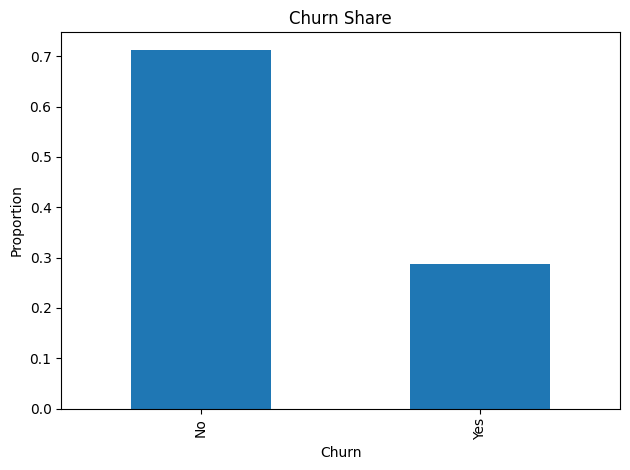


Churn % by IncomeGroup


Churn,churn_pct
IncomeGroup,
0,30.229840
7,29.794113
2,29.632721
1,29.131927
6,28.354325
5,28.273111
9,28.204206
4,27.658525
8,27.650648



Churn % by MaritalStatus


Churn,churn_pct
MaritalStatus,
Unknown,30.187817
Yes,28.540025
No,27.103025



Churn % by Homeownership


Churn,churn_pct
Homeownership,
Unknown,29.660023
Known,28.396151



Top positive correlations with churn (numeric):


CurrentEquipmentDays         0.103688
RetentionCalls               0.065301
RetentionOffersAccepted      0.034953
UniqueSubs                   0.034522
MonthsInService              0.018703
OverageMinutes               0.016461
ActiveSubs                   0.015515
PercChangeRevenues           0.011117
RoamingCalls                 0.010882
CallForwardingCalls         -0.001449
BlockedCalls                -0.005530
ReferralsMadeBySubscriber   -0.010686
MonthlyRevenue              -0.011987
IncomeGroup                 -0.012709
DroppedBlockedCalls         -0.013266
Name: __churn__, dtype: float64


Top negative correlations with churn (numeric):


CallWaitingCalls       -0.025653
UnansweredCalls        -0.029350
AgeHH1                 -0.029741
OutboundCalls          -0.032276
Handsets               -0.032845
PercChangeMinutes      -0.034202
InboundCalls           -0.034232
CustomerCareCalls      -0.035510
ReceivedCalls          -0.037453
PeakCallsInOut         -0.040029
HandsetModels          -0.040048
OffPeakCallsInOut      -0.040784
CustomerID             -0.041558
MonthlyMinutes         -0.050166
TotalRecurringCharge   -0.061296
Name: __churn__, dtype: float64

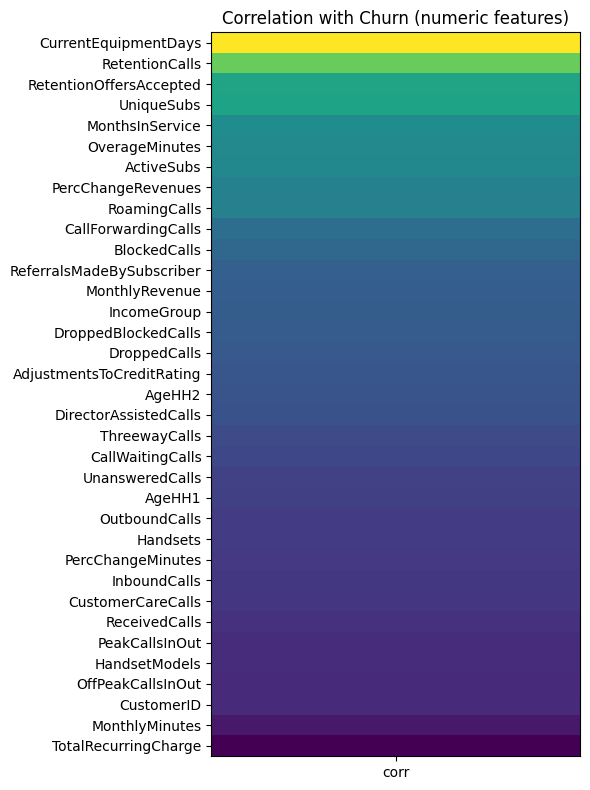

<Figure size 600x400 with 0 Axes>

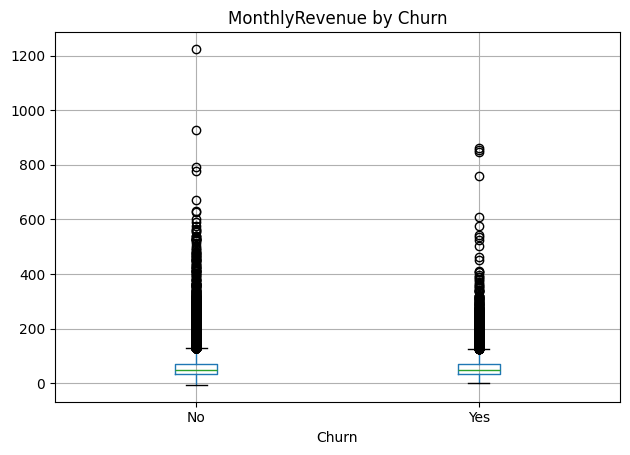

<Figure size 600x400 with 0 Axes>

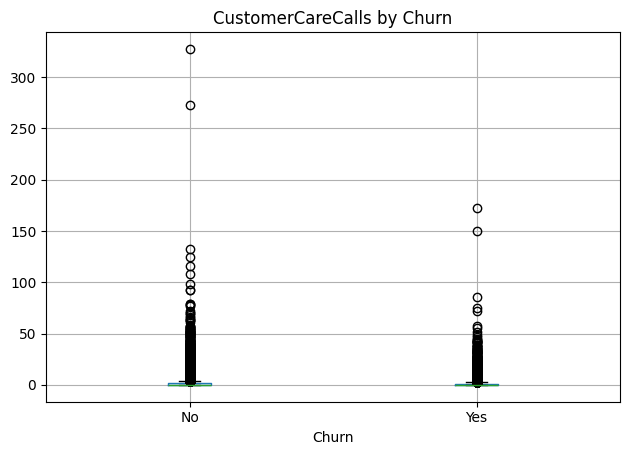

In [4]:
# %% [markdown]
# # 01 — EDA (Improved)
# Goals:
# - Verify shapes/dtypes/missing values
# - Churn distribution + segment breakdowns
# - Numeric correlation with churn (encoded 0/1)
# - Visuals for report (saved to /report/images)

# %%
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- Set your project root (edit if your path differs)
os.chdir(r"C:\Users\dell\Desktop\Cell2Cell_Project")

DATA_RAW = Path('data/raw')
IMG = Path('report/images'); IMG.mkdir(parents=True, exist_ok=True)

train = pd.read_csv(DATA_RAW / 'cell2celltrain.csv')
holdout = pd.read_csv(DATA_RAW / 'cell2cellholdout.csv')

print('train:', train.shape, '| holdout:', holdout.shape)
display(train.head(3))

# %%
# Basic info
print("dtypes (first 25 cols):\n", train.dtypes.head(25))
print("\nMissing values (top 20):")
display(train.isna().sum().sort_values(ascending=False).head(20))

# 'Unknown' frequency among categoricals
unknown_counts = train.select_dtypes('object').apply(lambda s: (s=='Unknown').sum())
print("\n'Unknown' counts (top 20):")
display(unknown_counts.sort_values(ascending=False).head(20))

# %%
# Churn distribution
print("\nChurn counts:")
print(train['Churn'].value_counts(dropna=False))
print("\nChurn share:")
print(train['Churn'].value_counts(normalize=True).round(3))

plt.figure()
(train['Churn'].value_counts(normalize=True)
     .sort_index()
     .plot(kind='bar', title='Churn Share'))
plt.ylabel('Proportion')
plt.tight_layout()
plt.savefig(IMG / 'eda_churn_share.png', dpi=150)
plt.show()

# %%
# Helper: churn % by categorical column
def churn_pct_by(df, col):
    base = df.groupby([col, 'Churn']).size().reset_index(name='n')
    pivot = base.pivot(index=col, columns='Churn', values='n').fillna(0)
    pivot['churn_pct'] = pivot.get('Yes', 0) / pivot.sum(axis=1) * 100
    return pivot[['churn_pct']].sort_values('churn_pct', ascending=False)

for col in ['IncomeGroup','MaritalStatus','Homeownership']:
    if col in train.columns:
        print(f"\nChurn % by {col}")
        display(churn_pct_by(train, col).head(15))

# %%
# Numeric correlation with churn (encode churn to 0/1)
df_num = train.select_dtypes(include=[np.number]).copy()
df_num['__churn__'] = (train['Churn'] == 'Yes').astype(int)

corr = df_num.corr(numeric_only=True)['__churn__'].drop('__churn__').sort_values(ascending=False)
print("\nTop positive correlations with churn (numeric):")
display(corr.head(15))
print("\nTop negative correlations with churn (numeric):")
display(corr.tail(15))

# Heatmap-style view (simple)
fig, ax = plt.subplots(figsize=(6,8))
ax.imshow(corr.values.reshape(-1,1), aspect='auto')
ax.set_yticks(range(len(corr.index)))
ax.set_yticklabels(corr.index)
ax.set_xticks([0])
ax.set_xticklabels(['corr'])
ax.set_title('Correlation with Churn (numeric features)')
plt.tight_layout()
plt.savefig(IMG / 'eda_corr_with_churn.png', dpi=150)
plt.show()

# %%
# Boxplots for key KPIs by churn
def boxplot_kpi(col):
    if col in train.columns:
        plt.figure(figsize=(6,4))
        train.boxplot(column=col, by='Churn')
        plt.title(f'{col} by Churn')
        plt.suptitle('')
        plt.tight_layout()
        plt.savefig(IMG / f'eda_box_{col}.png', dpi=150)
        plt.show()

for kpi in ['MonthlyRevenue','CustomerCareCalls']:
    boxplot_kpi(kpi)

# %% [markdown]
# **Notes (business):**
# - Churn share is X% (see bar). Segments with higher churn: review tables above.
# - Numeric drivers with higher correlation to churn can guide features for modeling.
# - Care calls often increase pre-churn; revenue patterns can drop/oscillate.
